### Median Listing Price and Median Sale Price

In [1]:
# Step 1: Import libraries 

# Import pandas for data manipulation, numpy for numerical operations,
# matplotlib for plotting, seaborn for styling, datetime for date management,
# and os for file management, and sklearn for statistical analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set visualization style for all plots
plt.style.use('grayscale')

# Print message to confirm all dependencies are imported successfully.
print("Dependencies imported successfully.")

Dependencies imported successfully.


In [2]:
# Ensure 'output' directory exists to save results
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)
print(f"Output directory '{output_dir}' is ready.")

Output directory 'output' is ready.


In [3]:
# Step 2: Load Zillow Research Data from CSV

# Read Zillow .csv files.
zillow_data_mlp = pd.read_csv('Median_Listing_Price.csv')
zillow_data_msp = pd.read_csv('Median_Sale_Price.csv')

# Combine dataframes
# combined_zillow_data = pd.concat([zillow_data_mlp,zillow_data_msp],ignore_index=True)
# combine_zillow_data = pd.merge(zillow_data_mlp,zillow_data_msp,on = 'RegionName')

# Confirm data was successfully loaded
print("Median_Listing_Price.csv loaded successfully.")
print("Median_Sale_Price.csv loaded successfully.")

Median_Listing_Price.csv loaded successfully.
Median_Sale_Price.csv loaded successfully.


In [4]:
# Display the first few rows of the Median Listing Price data to understand the structure and contents
print(zillow_data_mlp.head())

   RegionID  SizeRank       RegionName RegionType StateName  1/31/2018  \
0    102001         0    United States    country       NaN   255000.0   
1    394913         1     New York, NY        msa        NY   489000.0   
2    753899         2  Los Angeles, CA        msa        CA   709000.0   
3    394463         3      Chicago, IL        msa        IL   269900.0   
4    394514         4       Dallas, TX        msa        TX   318000.0   

   2/28/2018  3/31/2018  4/30/2018  5/31/2018  ...  12/31/2023  1/31/2024  \
0   264900.0   269900.0   279000.0   281000.0  ...    379000.0   379000.0   
1   505000.0   515000.0   519000.0   529900.0  ...    689900.0   685000.0   
2   725000.0   730000.0   750000.0   750000.0  ...    989000.0   988000.0   
3   289000.0   294900.0   299900.0   307000.0  ...    319900.0   320000.0   
4   325000.0   325990.0   334500.0   334900.0  ...    418000.0   410000.0   

   2/29/2024  3/31/2024  4/30/2024  5/31/2024  6/30/2024  7/31/2024  \
0   385000.0   394000

In [5]:
# Display the first few rows of the Median Sale Price data to understand the structure and contents
print(zillow_data_msp.head())

   RegionID  SizeRank       RegionName RegionType StateName  1/31/2018  \
0    102001         0    United States    country       NaN   215000.0   
1    394913         1     New York, NY        msa        NY   375000.0   
2    753899         2  Los Angeles, CA        msa        CA   589000.0   
3    394463         3      Chicago, IL        msa        IL   208000.0   
4    394514         4       Dallas, TX        msa        TX   235000.0   

   2/28/2018  3/31/2018  4/30/2018  5/31/2018  ...  11/30/2023  12/31/2023  \
0   217000.0   224500.0   227000.0   231700.0  ...    325000.0    320000.0   
1   365000.0   380000.0   378000.0   389995.0  ...    565000.0    567600.0   
2   613000.0   620000.0   621000.0   638000.0  ...    900000.0    870000.0   
3   210000.0   220000.0   230000.0   235000.0  ...    285000.0    280000.0   
4   248900.0   258000.0   258000.0   267500.0  ...    375000.0    367500.0   

   1/31/2024  2/29/2024  3/31/2024  4/30/2024  5/31/2024  6/30/2024  \
0   324000.0   

In [6]:
# Display the first few rows of the Median Sale Price data to understand the structure and contents
# print(combine_zillow_data.head())

In [7]:
# Step 3: Data Cleaning and Preprocessing

# Melt the dataframe to transform date columns into rows for easier time-series analysis
id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
zillow_melted_mlp = pd.melt(zillow_data_mlp, id_vars=id_vars, var_name='Date', value_name='Value')
zillow_melted_msp = pd.melt(zillow_data_msp, id_vars=id_vars, var_name='Date', value_name='Value')

# Convert 'Date' column from string to datetime format for easy date filtering and manipulation
zillow_melted_mlp['Date'] = pd.to_datetime(zillow_melted_mlp['Date'])
zillow_melted_msp['Date'] = pd.to_datetime(zillow_melted_msp['Date'])

# Remove any rows containing missing data to ensure clean analysis.
zillow_melted_mlp.dropna(inplace=True)
zillow_melted_msp.dropna(inplace=True)

print("Data cleaning completed.")

Data cleaning completed.


In [8]:
# Step 4: Exploratory Data Analysis (Full Data)

## 4.1A Overall Median Listing Price (U.S)

# Calculate the overall median lisitng price across the entire U.S.
overall_mdn_value_mlp = zillow_melted_mlp['Value'].median()
print(f"Overall Median Lisitng Price in the U.S.: ${overall_mdn_value_mlp:,.2f}")

## 4.1B Overall Median Sale Price (U.S)

# Calculate the overall median sale price across the entire U.S.
overall_mdn_value_msp = zillow_melted_msp['Value'].median()
print(f"Overall Median Sale Ptice in the U.S.: ${overall_mdn_value_msp:,.2f}")


# Sales-to-List Ratio (A)
sales_to_list = overall_mdn_value_msp / overall_mdn_value_mlp

# Sales-to-List Ratio as DataFrame
#df = pd.DataFrame({
 #   'List Price': [overall_mdn_value_mlp],
  #  'Sales Price': [overall_mdn_value_msp]
#})

#df['Sales to List Ratio'] = df['Sales Price'] / df['List Price']
#df['Percentage'] = df['Sales to List Ratio'].apply(lambda x: f'{x:.2%}')

print(f"Overall Median Sale-to-List Ratio the U.S.: {sales_to_list:,.2%}")
#print(df)
      
                  

Overall Median Lisitng Price in the U.S.: $227,250.00
Overall Median Sale Ptice in the U.S.: $199,000.00
Overall Median Sale-to-List Ratio the U.S.: 87.57%


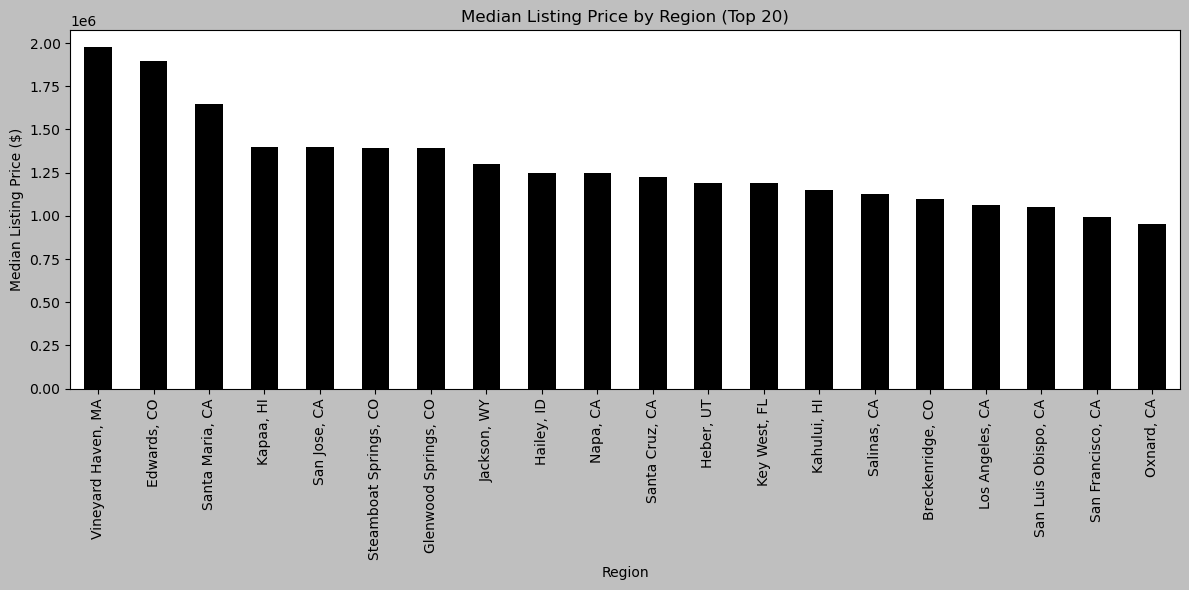

Results saved as 'Median Lisitng Price by Region (Top 20).png


In [9]:
## 4.2 Median Lisitng Price by Region (Top 20) 

# Find the most recent date in the data to focus on current home values
latest_date = zillow_melted_mlp['Date'].max() 

# Filter the data for the latest date to get the most recent values
latest_values = zillow_melted_mlp[zillow_melted_mlp['Date'] == latest_date] 

# Calculate the median lisitng price for each region, sort by value in descending order
max_mdn_values_mlp = latest_values.groupby('RegionName')['Value'].median().sort_values(ascending=False) 

# Plot the top 20 regions with the highest median listing price.
plt.figure(figsize=(12, 6)) 
max_mdn_values_mlp.head(20).plot(kind='bar') 

# Augment or and incorporate the other graph properties
plt.title('Median Listing Price by Region (Top 20)') 
plt.xlabel('Region') 
plt.ylabel('Median Listing Price ($)') 
plt.xticks(rotation=90) 
plt.tight_layout()

# Save figure to the output folder
plt.savefig(os.path.join(output_dir, 'Median Lisitng Price by Region (Top 20).png'))

# Display the plot
plt.show()

print("Results saved as 'Median Lisitng Price by Region (Top 20).png")

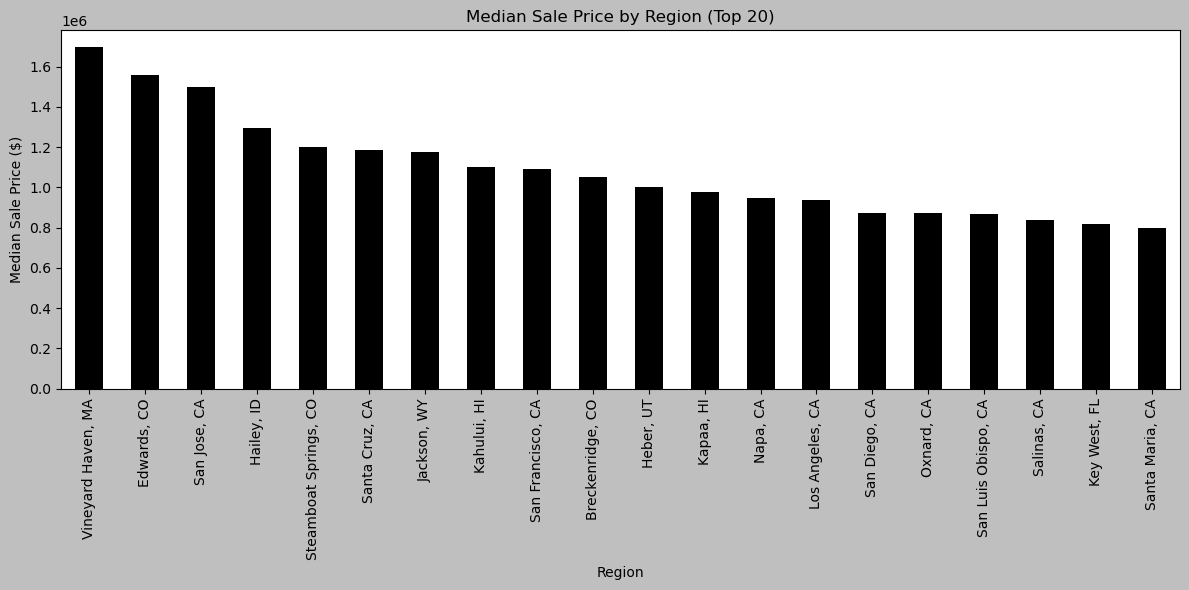

Results saved as 'Median Sale Price by Region (Top 20).png


In [10]:
## 4.2 Median Sale Price by Region (Top 20) 

# Find the most recent date in the data to focus on current home values
latest_date = zillow_melted_msp['Date'].max() 

# Filter the data for the latest date to get the most recent values
latest_values = zillow_melted_msp[zillow_melted_msp['Date'] == latest_date] 

# Calculate the median lisitng price for each region, sort by value in descending order
max_mdn_values_msp = latest_values.groupby('RegionName')['Value'].median().sort_values(ascending=False) 

# Plot the top 20 regions with the highest median listing price.
plt.figure(figsize=(12, 6)) 
max_mdn_values_msp.head(20).plot(kind='bar') 

# Augment or and incorporate the other graph properties
plt.title('Median Sale Price by Region (Top 20)') 
plt.xlabel('Region') 
plt.ylabel('Median Sale Price ($)') 
plt.xticks(rotation=90) 
plt.tight_layout()

# Save figure to the output folder
plt.savefig(os.path.join(output_dir, 'Median Sale Price by Region (Top 20).png'))

# Display the plot
plt.show()

print("Results saved as 'Median Sale Price by Region (Top 20).png")

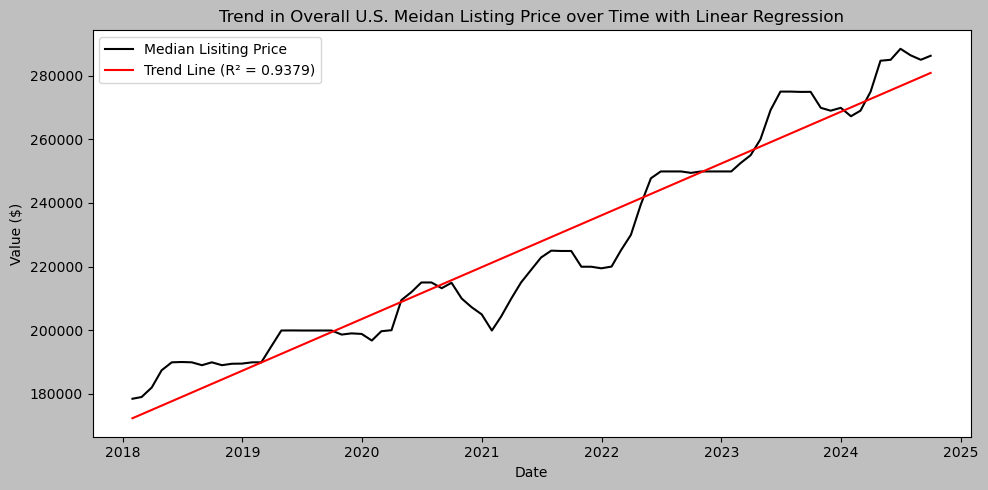

R-squared value for Overall U.S.: 0.9379


In [11]:
## Step 5.1: Trend Line (Linear Regression) with R-squared Value

# Function to calculate and plot trend with linear regression
def calculate_trend_with_r2(data, region_name):
    mdn_values_over_time = data.groupby('Date')['Value'].median().reset_index()
    X = mdn_values_over_time['Date'].map(datetime.toordinal).values.reshape(-1, 1)
    y = mdn_values_over_time['Value'].values

    # Fit Linear Regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(mdn_values_over_time['Date'], y, label='Median Lisiting Price')
    plt.plot(mdn_values_over_time['Date'], y_pred, color='red', label=f'Trend Line (R² = {r_squared:.4f})')
    plt.title(f"Trend in {region_name} Meidan Listing Price over Time with Linear Regression")
    plt.xlabel("Date")
    plt.ylabel("Value ($)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{region_name.lower().replace(" ", "_")}Median Lisitng Price over Time.png')
    plt.show()

    print(f"R-squared value for {region_name}: {r_squared:.4f}")

# Overall U.S.
calculate_trend_with_r2(zillow_melted_mlp, 'Overall U.S.')

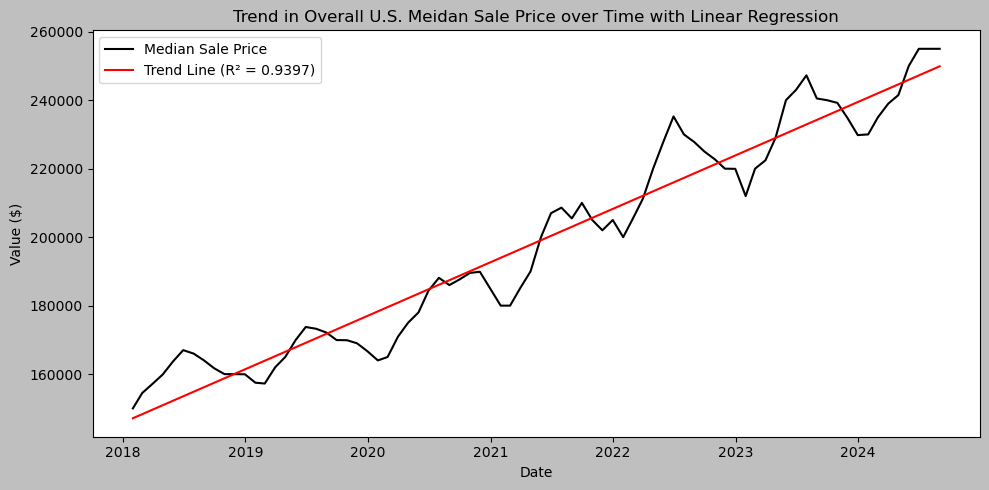

R-squared value for Overall U.S.: 0.9397


In [12]:
## Step 5.2: Trend Line (Linear Regression) with R-squared Value

# Function to calculate and plot trend with linear regression
def calculate_trend_with_r2(data, region_name):
    mdn_values_over_time = data.groupby('Date')['Value'].median().reset_index()
    X = mdn_values_over_time['Date'].map(datetime.toordinal).values.reshape(-1, 1)
    y = mdn_values_over_time['Value'].values

    # Fit Linear Regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(mdn_values_over_time['Date'], y, label='Median Sale Price')
    plt.plot(mdn_values_over_time['Date'], y_pred, color='red', label=f'Trend Line (R² = {r_squared:.4f})')
    plt.title(f"Trend in {region_name} Meidan Sale Price over Time with Linear Regression")
    plt.xlabel("Date")
    plt.ylabel("Value ($)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{region_name.lower().replace(" ", "_")}Median Sale Price over Time.png')
    plt.show()

    print(f"R-squared value for {region_name}: {r_squared:.4f}")

# Overall U.S.
calculate_trend_with_r2(zillow_melted_msp, 'Overall U.S.')

In [13]:
# Step 6: Conclusions and Insights (Full Data)

# Print out insights and findings based on the analysis
print("\nConclusions:")

# (a) Median Lisitng Price vs. Median Sale Price Across Regions
print("a. Is there a difference between median listing price and median sale price across regions?")
print(f"   i. The median listing price overall in the U.S. is ${overall_mdn_value_mlp:,.2f}")
print(f"   ii. The median sale price overall in the U.S. is ${overall_mdn_value_msp:,.2f}")
print(f"   iii. The region with the highest median lisitng price is {max_mdn_values_mlp.index[0]} with a median listing price of ${max_mdn_values_mlp.iloc[0]:,.2f}.")
print(f"   iv. The region with the highest median sale price is {max_mdn_values_msp.index[0]} with a median sale price of ${max_mdn_values_msp.iloc[0]:,.2f}.")
print(f"   V.  The sales to list ratio is equal to {sales_to_list:,.2%}. Since the ratio is under 100%, the properties for sale have sold for less than listing price.")


Conclusions:
a. Is there a difference between median listing price and median sale price across regions?
   i. The median listing price overall in the U.S. is $227,250.00
   ii. The median sale price overall in the U.S. is $199,000.00
   iii. The region with the highest median lisitng price is Vineyard Haven, MA with a median listing price of $1,975,000.00.
   iv. The region with the highest median sale price is Vineyard Haven, MA with a median sale price of $1,695,937.50.
   V.  The sales to list ratio is equal to 87.57%. Since the ratio is under 100%, the properties for sale have sold for less than listing price.


In [14]:
# Step 10: Save processed data

# Save the cleaned and reshaped full Zillow dataset to the output folder.
zillow_melted_mlp.to_csv(os.path.join(output_dir, 'processed_zillow_data_mlp.csv'))
zillow_melted_msp.to_csv(os.path.join(output_dir, 'processed_zillow_data_msp.csv'))
print("Processed data saved as 'output/processed_zillow_data_mlp.csv'")
print("Processed data saved as 'output/processed_zillow_data_msp.csv'")
print("\nAnalysis complete!")

Processed data saved as 'output/processed_zillow_data_mlp.csv'
Processed data saved as 'output/processed_zillow_data_msp.csv'

Analysis complete!
